<a href="https://colab.research.google.com/github/UthayakumarThenujan/ML_technique/blob/main/simpleregressionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataFrame = pd.read_csv('Housing.csv')

In [ ]:
dataFrame.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [ ]:
dataFrame.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data=dataFrame.drop(['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis=1)

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a filter condition to remove outliers
filter_condition = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the filter to the DataFrame to remove outliers
df_without_outliers = data[filter_condition]

print(df_without_outliers)

       price  area  bedrooms  bathrooms  stories  parking
15   9100000  6000         4          1        2        2
16   9100000  6600         4          2        2        1
18   8890000  4600         3          2        2        2
19   8855000  6420         3          2        2        1
20   8750000  4320         3          1        2        2
..       ...   ...       ...        ...      ...      ...
540  1820000  3000         2          1        1        2
541  1767150  2400         3          1        1        0
542  1750000  3620         2          1        1        0
543  1750000  2910         3          1        1        0
544  1750000  3850         3          1        2        0

[463 rows x 6 columns]


with outlier


<Axes: xlabel='area', ylabel='price'>

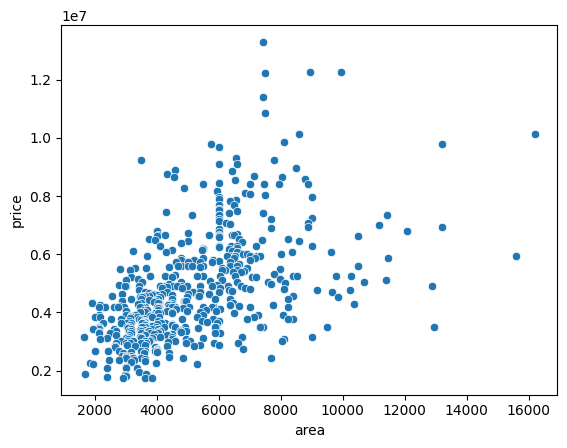

In [ ]:
print('with outlier')
sns.scatterplot(x='area', y='price', data=dataFrame)

without outlier


<Axes: xlabel='area', ylabel='price'>

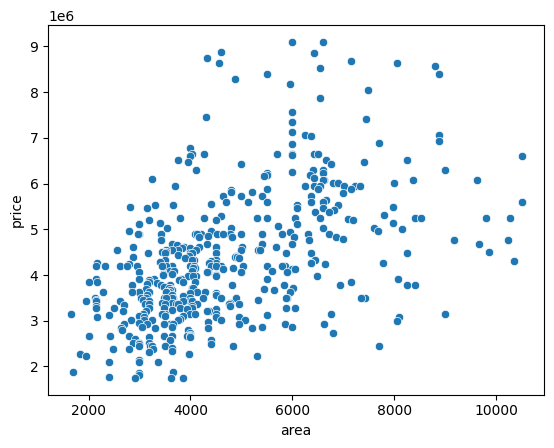

In [ ]:
print('without outlier')
sns.scatterplot(x='area',y='price',data=df_without_outliers)

<Axes: xlabel='bedrooms', ylabel='price'>

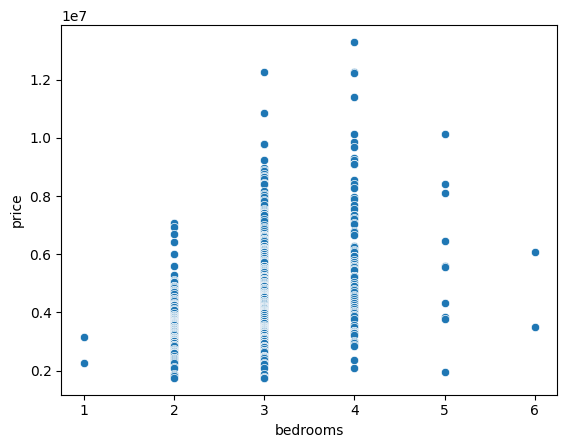

In [ ]:
sns.scatterplot(x='bedrooms', y='price', data=dataFrame)

<Axes: xlabel='bedrooms', ylabel='price'>

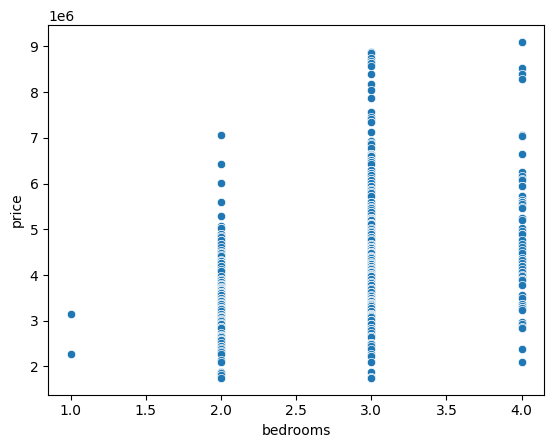

In [ ]:
sns.scatterplot(x='bedrooms', y='price', data=df_without_outliers)

<Axes: xlabel='bathrooms', ylabel='price'>

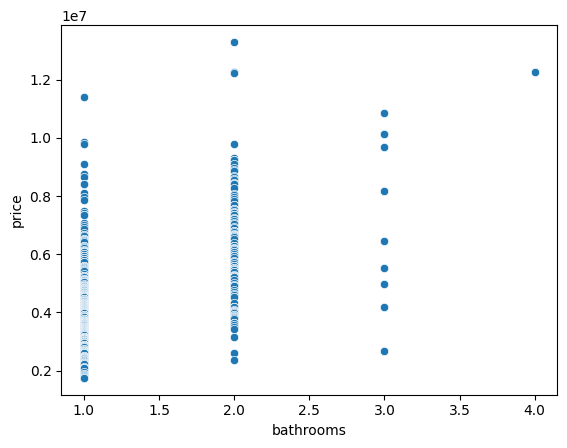

In [ ]:
sns.scatterplot(x='bathrooms', y='price', data=dataFrame)

<Axes: xlabel='parking', ylabel='price'>

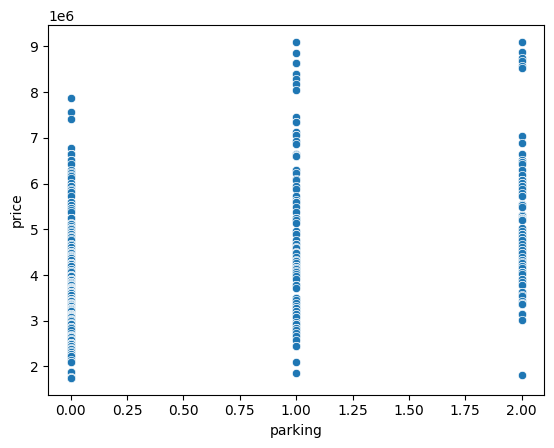

In [ ]:
sns.scatterplot(x='parking', y='price', data=df_without_outliers)

<Axes: xlabel='stories', ylabel='price'>

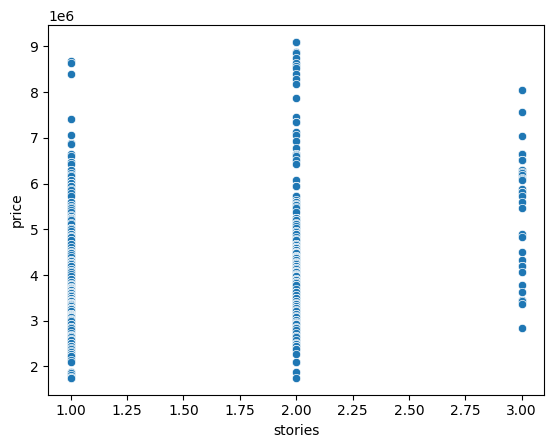

In [ ]:
sns.scatterplot(x='stories', y='price', data=df_without_outliers)

In [ ]:
trainData = df_without_outliers[['price','area']]

<Axes: xlabel='area', ylabel='price'>

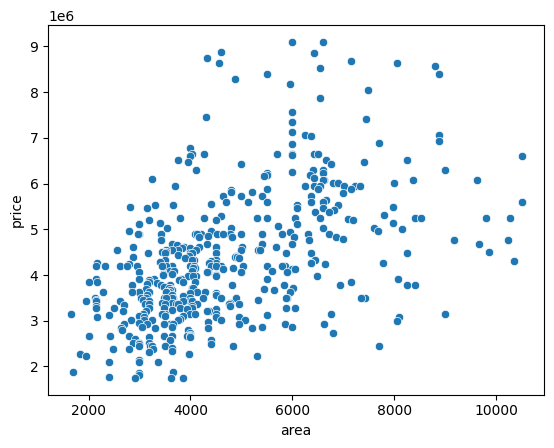

In [ ]:
sns.scatterplot(x='area', y='price', data=trainData)

In [ ]:
# Min-Max Normalization
def min_max_normalize(x):
    return (x - x.min()) / (x.max() - x.min())

# Normalize features and labels
X_normalized = min_max_normalize(trainData['area'])
y_normalized = min_max_normalize(trainData['price'])

In [ ]:
X = X_normalized.to_numpy()
Y = y_normalized.to_numpy()
print('x shape: ',X.shape)
print('y shape: ', Y.shape)

x shape:  (463,)
y shape:  (463,)


In [ ]:
def model(X, W, b):
    return X * W + b

In [ ]:
def loss(Y_pred,Y):
    m = len(Y)  # Number of samples
    return (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)

In [ ]:
def gradient_descent(X,Y,W, b, learning_rate, epochs):
    m = X.shape[0]
    cost_history = []
    for epoch in range(epochs):
        Y_pred = model(X, W, b)
        cost = loss(Y_pred,Y)
        cost_history.append(cost)
        print(f'Epoch {epoch + 1}/{epochs} - Cost: {cost}')
        dW = (1 / m) * np.sum((Y_pred - Y) * X)
        db = (1 / m) * np.sum(Y_pred - Y)
        W -= learning_rate * dW
        b -= learning_rate * db

    return W, b, cost_history

In [ ]:
W = np.random.randn(1)
b = np.random.randn(1)
print('W: ',W)
print('b: ',b)
W,b,loss = gradient_descent(X,Y,W,b,0.01,1000)


W:  [0.11265564]
b:  [-1.11342042]
Epoch 1/1000 - Cost: 1.041262767918478
Epoch 2/1000 - Cost: 1.0182235381873606
Epoch 3/1000 - Cost: 0.9957014572087601
Epoch 4/1000 - Cost: 0.9736849167899897
Epoch 5/1000 - Cost: 0.9521625693019875
Epoch 6/1000 - Cost: 0.9311233218305673
Epoch 7/1000 - Cost: 0.9105563304589553
Epoch 8/1000 - Cost: 0.8904509946786605
Epoch 9/1000 - Cost: 0.8707969519258058
Epoch 10/1000 - Cost: 0.8515840722400957
Epoch 11/1000 - Cost: 0.8328024530436755
Epoch 12/1000 - Cost: 0.8144424140371829
Epoch 13/1000 - Cost: 0.7964944922103687
Epoch 14/1000 - Cost: 0.7789494369647101
Epoch 15/1000 - Cost: 0.7617982053455049
Epoch 16/1000 - Cost: 0.7450319573809893
Epoch 17/1000 - Cost: 0.728642051526074
Epoch 18/1000 - Cost: 0.712620040208356
Epoch 19/1000 - Cost: 0.6969576654741046
Epoch 20/1000 - Cost: 0.6816468547319801
Epoch 21/1000 - Cost: 0.6666797165922913
Epoch 22/1000 - Cost: 0.6520485367996495
Epoch 23/1000 - Cost: 0.6377457742569157
Epoch 24/1000 - Cost: 0.6237640571

In [ ]:
print('W: ',W)
print('b: ',b)

W:  [0.55183788]
b:  [0.1619036]


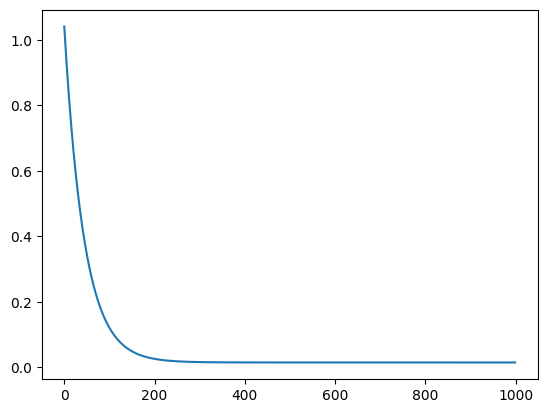

In [ ]:
plt.plot(loss)

In [ ]:
print('start loss:',loss[0])
print('last loss:', loss[-1])

start loss: 1.041262767918478
last loss: 0.014797350271433092


In [ ]:
def predict(X, W, b):
    return X * W + b

print(predict(6000,W,b))

[3311.1892057]
